authors : Awa DIATTARA & Chimango NYASULU






## `1)Introduction:` <a class="anchor" id="1"></a>
The purpose of this lab is to demonstrate, using an example dataset, how to do  time-series analysis.

Times-series analysis is a powerful tool for understanding past behavior and predicting future trends. It is essential in various domains for decision-making and strategic planning based on data-driven insights.


`Time-Series Data`
A time-series data set consists of data points or observations recorded at different or regular time intervals. Typically, a time series is a sequence of data points taken at equally spaced time intervals. The frequency of these recorded data points can vary: hourly, daily, weekly, monthly, quarterly, or annually.

`Time-Series Forecasting`
Time-Series Forecasting involves using a statistical model to predict future values of a time series based on its past observations. This process helps in making informed predictions by analyzing historical data trends and patterns.

`Time-Series Analysis`
Time-Series Analysis encompasses statistical methods for examining time-series data. These methods enable us to extract meaningful statistics, patterns, and other characteristics from the data. Time series are typically visualized using line charts, which help in understanding the inherent aspects of the data, thereby allowing for the creation of meaningful and accurate forecasts.

`Examples of Applications of Time-Series Analysis`
Time-series analysis is widely used in various fields such as statistics, finance, and business. Some common applications include sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition, and earthquake prediction.

`Components of a Time-Series`
- `Trend`: the trend component represents the general direction in which the time series data is moving over a long period. It shows whether the data is increasing, decreasing, or remaining stable over time.

- `Seasonality`: seasonality refers to the repeating short-term cycle in the time series data, typically observed over a specific period, such as a day, week, month, or year.

- `Cyclic Patterns`: cyclic patterns are long-term oscillations observed in the data, often influenced by economic or business cycles. Unlike seasonality, the duration and amplitude of cyclic patterns can vary.

- `Irregular Component` (Noise): the irregular component represents the random variations in the data that cannot be attributed to the trend, seasonality, or cyclic patterns. This component is often due to unpredictable factors or random noise.

- `ETS Decomposition` is a method used to separate the different components of a time series. The term ETS stands for Error, Trend, and Seasonality. This decomposition helps in analyzing and understanding the underlying patterns and variations in the data by isolating these three key components.










## `2) Data Type:` <a class="anchor" id="1"></a>


Time series data can be categorized into three types:

- `Time Series Data`: this consists of observations of a variable recorded at different points in time.

- `Cross-Sectional Data`: this type of data involves observations of one or more variables recorded at a single point in time.

- `Pooled Data`: this is a combination of time series data and cross-sectional data, integrating both dimensions into the analysis


## `3) Key Terms and Concepts in Time Series:` <a class="anchor" id="1"></a>
Familiarity with the following terms and concepts is crucial in time series analysis:

- `Dependence`: the association between two observations of the same variable at different time periods.

- `Stationarity`: a series is stationary if its mean value remains constant over time. If past effects accumulate, causing values to trend towards infinity, the series is not stationary.

- `Differencing`: this technique is used to make a series stationary and control auto-correlations. However, some time series do not require differencing, and over-differencing can result in incorrect estimates.

- `Specification`: this involves testing the relationships of dependent variables, whether linear or non-linear, using time series models like ARIMA.

- `Exponential Smoothing`: this method predicts the next period's value based on past and current values. It involves averaging the data in such a way that the non-systematic components of each observation cancel out. Exponential smoothing is primarily used for short-term predictions.

- `Curve Fitting`: Curve fitting is used in time series analysis when data exhibits a non-linear relationship. It involves finding the best-fit curve that describes the relationship between variables.

- `ARIMA`: ARIMA stands for AutoRegressive Integrated Moving Average. It is a popular time series forecasting method that combines autoregression, differencing, and moving averages to model the data.



## `4) Time Series Analysis:` <a class="anchor" id="1"></a>

## `4.1) Import Libraries` <a class="anchor" id="1"></a>

Each of these libraries plays a crucuail role in various aspects of data analysis, visualization and general python programming, enhancing efficiency and capability when working with data and computational tasks


*   **`Pandas`** : is a powerful data manipulation and analysis for python. It provides data structure like "dataframe" and "series",etc.

*   **`numpy`**: provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions

*   **`matplotlib`** : helps to create static, animated and interactive vizualisations. It supports a wide variety of plots and charts.

*   **`seaborn`**: excels in visualizing statistical relationships between variables; it enhance the Matplotlib's default aesthetics

*   **`time`** : provides various time-related functions in Python. It includes functions for working with timestamps, measuring time durations and delaying execution.

*   **`pickle`** : is useful for saving and loading ML models, saving program state between sessions or transferring python objects between différent machines por processes.

*   **`%matplotlib inline`** : not a library, but a magic command used to display Matplotlib plots inline within the notebook., it eliminatated the use of plt.show() after each plot command.

Libraires to import for our dataset


---



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In the section below we want to suppress non-critical warning and display all column headers when working with data using pandas.

pd.set_option("display.max_columns",None) : this code sets no limit to the number of columns displayed. This often improves readability and the development expérience, especially when dealing with large datasets or complex analyses.

In [6]:
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",None)

In [ ]:
t

## `4.2) Load the Dataset`  <a class="anchor" id="3"></a>
The dataset we will use in this lab contains weather condition for Pakistan.

Data source: [Kaggle](https://www.kaggle.com/code/sonialikhan/weather-prediction-for-pakistan-2024/input)

**The Columns Description:**

<span style='font-size:15px;'><b>` Date:`</b> The date.</span><br>
<span style='font-size:15px;'><b>` Precipitation:`</b> The precipitation.</span><br>
<span style='font-size:15px;'><b>` Temp_max:`</b> The maximum temperature</span><br>
<span style='font-size:15px;'><b>` Temp_min:`</b> The minimum temperature.</span><br>
<span style='font-size:15px;'><b>` Wind:`</b> The wind.</span><br>
<span style='font-size:15px;'><b>` Weather:`</b> The weather.</span><br>


## `3) Load the Dataset`  <a class="anchor" id="3"></a>

Dataset can be loaded using methods like:

`read_csv()` for a CSV file

`read_excel()` for Excel file





In [7]:
from google.colab import files
uploaded = files.upload()


Saving seattle-weather.csv to seattle-weather.csv


In [8]:
weather = pd.read_csv("seattle-weather.csv")

In [9]:
#Display the first five rows of the Dataframe

weather.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [10]:
weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [11]:
# generate descriptive statistics (tendency, dispersion, shape, excluding NaN values), useful for quickly getting a sense of the data you are working with

weather.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


## `4) Time Series Analysis`  <a class="anchor" id="4"></a>




## `4.1) Data Exploration`  <a class="anchor" id="4"></a>

The objective of this step is to:
*  Get basic information about the data (dimensions, data types, descriptive statistics).
*  Explore the distribution of numerical variables using histograms and boxplots.
* Identify potential missing values and outliers using visualization techniques.






In [12]:
# The shape property is used to find the dimensions of the dataset (DataFrame or a Numpy array). Useful for quickly understanding the soize of your dataset

weather.shape

(1461, 6)

In [13]:
# A concise summary of a Datase, including number of entries, columns, non-null counts and rough memory usage
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


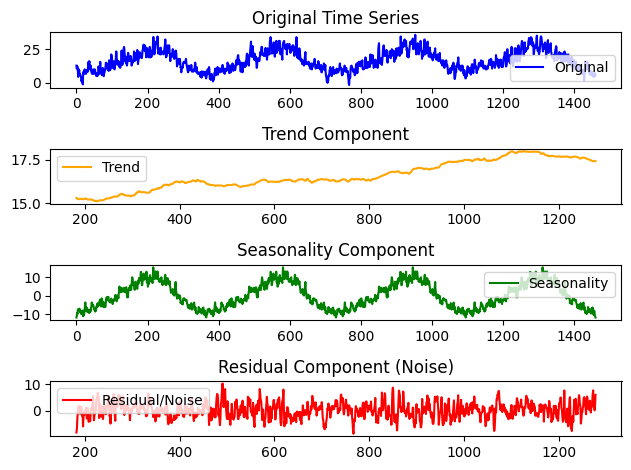

In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your dataset
# Replace 'your_timeseries_data.csv' with your actual data file
#df = pd.read_csv('seattle-weather.csv', parse_dates=['date'], index_col='date')

# Extract the 'temp_max' column as the time series data
time_series = weather['temp_max']

# Ensure the time series is correctly sorted by date
time_series.sort_index(inplace=True)

# Perform ETS decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=365)  # The period parameter is set to 365, assuming the data has daily frequency with yearly seasonality.

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(time_series, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residual/Noise', color='red')
plt.legend(loc='best')
plt.title('Residual Component (Noise)')

plt.tight_layout()
plt.show()

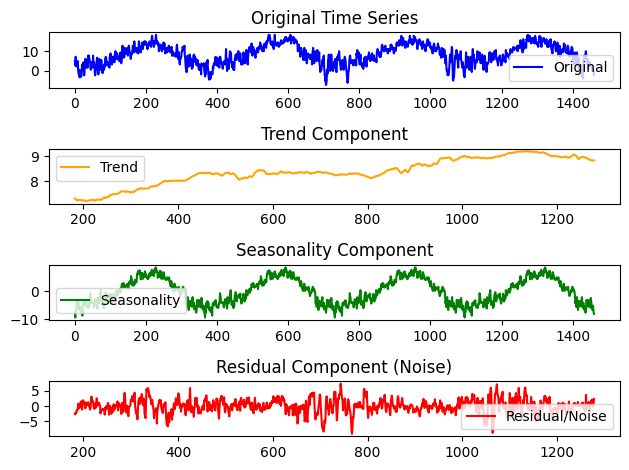

In [15]:
# Extract the 'temp_max' column as the time series data
time_series = weather['temp_min']

# Ensure the time series is correctly sorted by date
time_series.sort_index(inplace=True)

# Perform ETS decomposition
decomposition = seasonal_decompose(time_series, model='additive', period=365)  # The period parameter is set to 365, assuming the data has daily frequency with yearly seasonality.

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(time_series, label='Original', color='blue')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.title('Seasonality Component')

plt.subplot(414)
plt.plot(residual, label='Residual/Noise', color='red')
plt.legend(loc='best')
plt.title('Residual Component (Noise)')

plt.tight_layout()
plt.show()

In [16]:
weather.isnull()

,date,precipitation,temp_max,temp_min,wind,weather
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1456,False,False,False,False,False,False
1457,False,False,False,False,False,False
1458,False,False,False,False,False,False
1459,False,False,False,False,False,False


In [17]:
weather.isna().sum()

,0
date,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [18]:
#Find the number of duplicated rows
weather.duplicated().sum()

0

In [19]:
#find all rows in the weather DataFrame where the value in the temp_min column is equal to the minimum value of the temp_min column.
weather[weather['temp_min']==min(weather.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [20]:
##find all rows in the weather DataFrame where the value in the temp_max column is equal to the maximum value of the temp_max column.
weather[weather['temp_max']==max(weather.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
953,2014-08-11,0.5,35.6,17.8,2.6,rain


The code below show a histogram which display the distribution of maximum temperature values, showing how frequently each range of temperatures occurs in the dataset. The plot is set to be 12 inches wide and 6 inches tall, providing a clear and detailed view of the data distribution.

<Axes: xlabel='temp_max', ylabel='Count'>

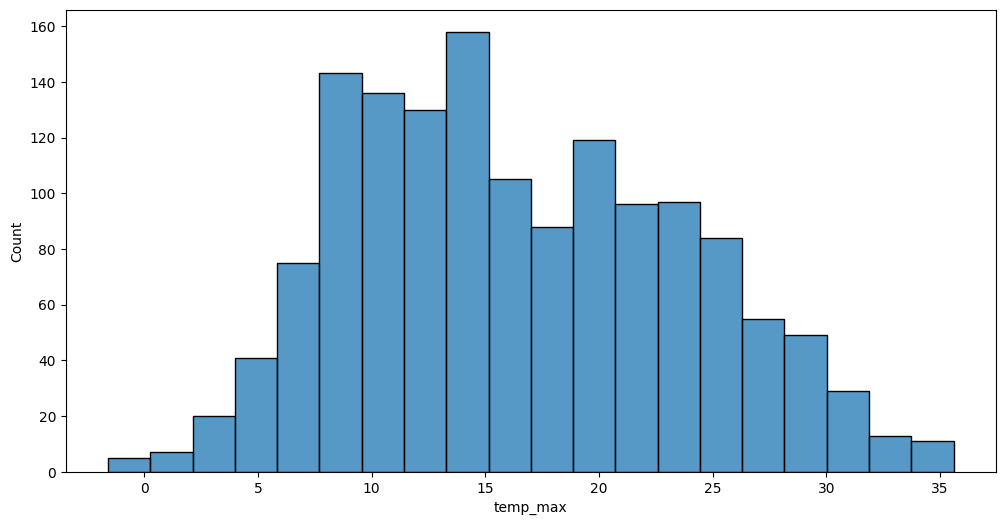

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather,x=weather.temp_max,bins=20)

<Axes: xlabel='temp_min', ylabel='Count'>

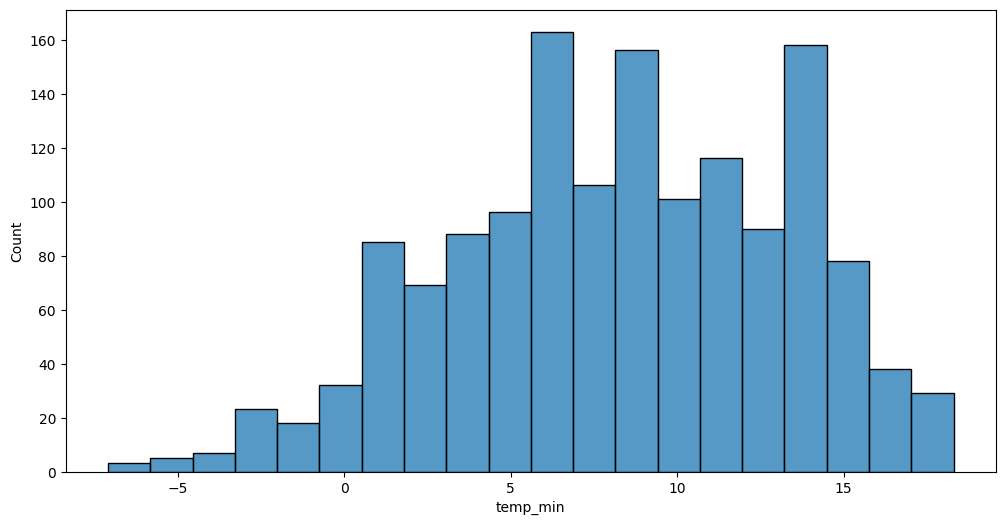

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(data=weather,x=weather.temp_min,bins=20)

In [23]:
#Convert the 'date' column to datetime
weather['date'] = pd.to_datetime(weather['date'])

# Select specific columns (date and temp_max)
selected_columns = weather.loc[:, ['date', 'temp_max']]
print(selected_columns)

           date  temp_max
0    2012-01-01      12.8
1    2012-01-02      10.6
2    2012-01-03      11.7
3    2012-01-04      12.2
4    2012-01-05       8.9
...         ...       ...
1456 2015-12-27       4.4
1457 2015-12-28       5.0
1458 2015-12-29       7.2
1459 2015-12-30       5.6
1460 2015-12-31       5.6

[1461 rows x 2 columns]


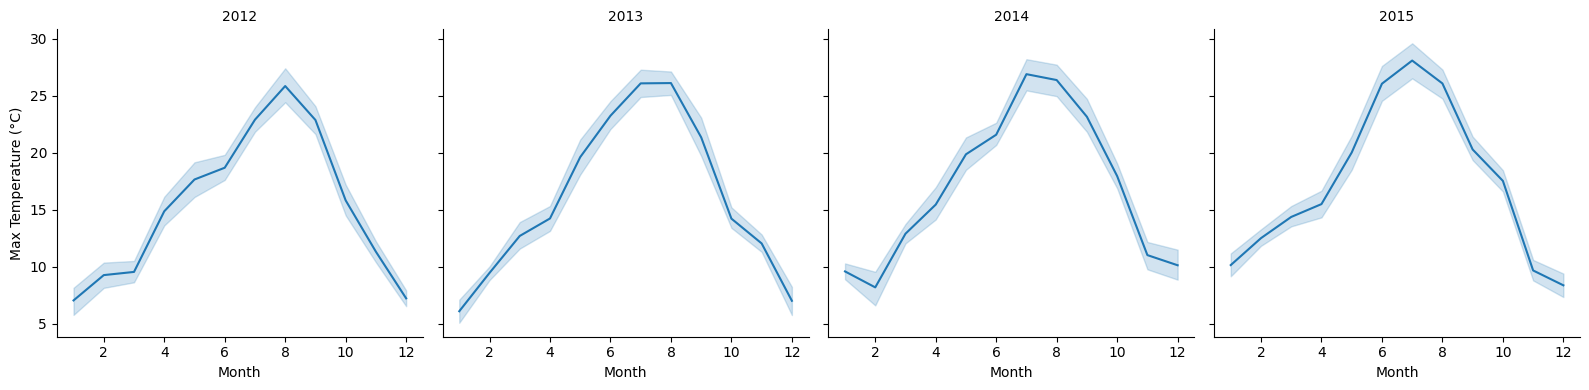

In [24]:
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
g = sns.FacetGrid(weather, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

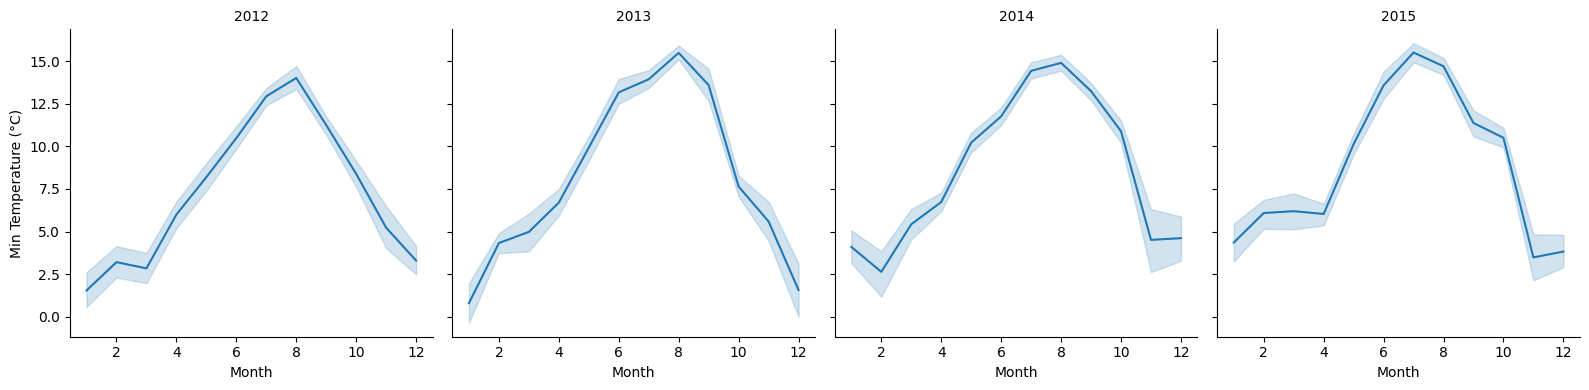

In [25]:
weather['year'] = weather['date'].dt.year
weather['month'] = weather['date'].dt.month
g = sns.FacetGrid(weather, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

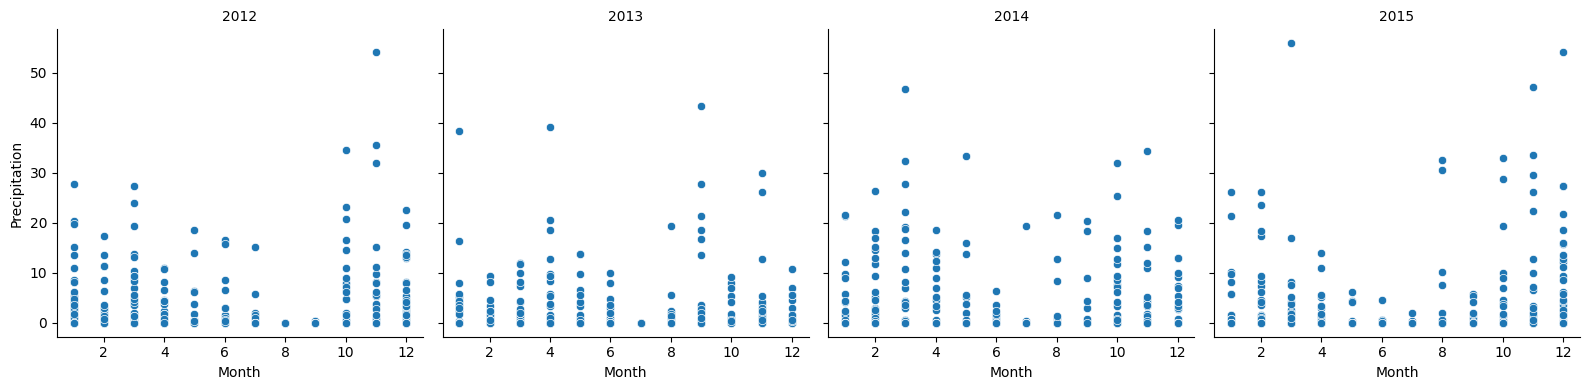

In [26]:
g = sns.FacetGrid(weather, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

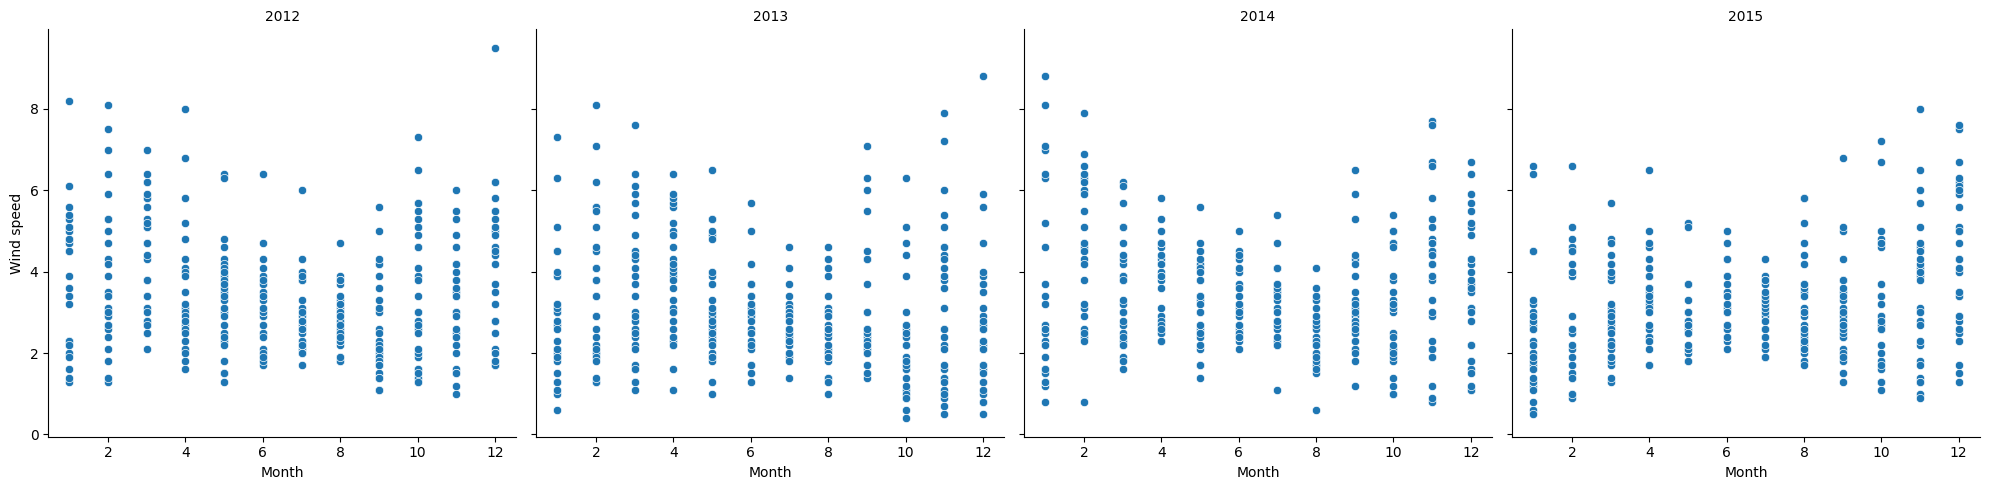

In [27]:
g = sns.FacetGrid(weather, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [28]:
# counts the occurrences of unique values in the weather column of the weather DataFrame
#Allow to see the distribution of different weather type
weather.weather.value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


<Axes: xlabel='weather', ylabel='count'>

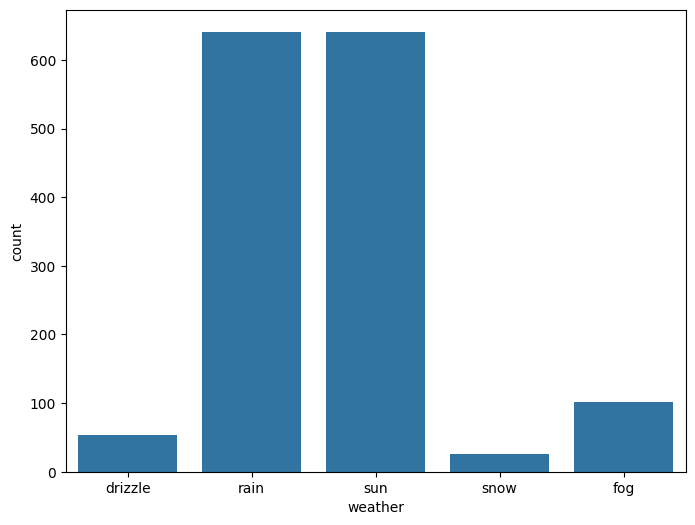

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(data=weather,x=weather.weather)

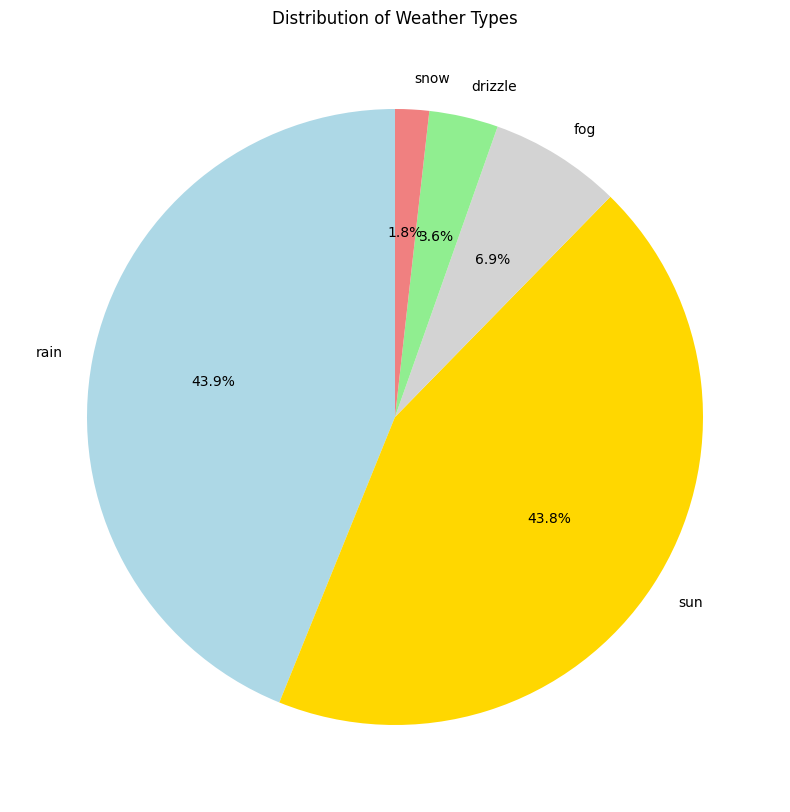

In [30]:
x=weather.weather.value_counts()
plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'gold', 'lightgray', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Weather Types')
plt.show()

 Import of some functions needed:

-  `train_test_split` : function to split dataset into train and test

- `GaussianNB`: the Gaussian Naive Bayes classifier, which is a probabilistic classifier based on applying Bayes' theorem with the assumption of independence among predictors. It is particularly suitable for continuous data and is often used for classification tasks.

- `accuracy_score, classification_report, confusion_matrix` : functions to evaluate performance of the classification model

- `LabelEncoder`: This class is used to convert categorical labels into numeric form


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int32         
 7   month          1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(2), object(1)
memory usage: 80.0+ KB


Using LabelEncoder is a common preprocessing step in machine learning when dealing with categorical data. By converting categories into numbers, you enable algorithms that require numerical input to effectively use the categorical features in their calculations.

In [32]:
le=LabelEncoder()
weather['weather']=le.fit_transform(weather['weather'])
print(weather['weather'])

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int64


In [33]:
#Features selection
x = weather[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=weather['weather']

#Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)#This sets a seed for the random number generato

#Model creation and training a Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

#making predictions
y_pred = nb_model.predict(X_test)

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

#Printing the accuracy
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [34]:
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      1.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.67       293
weighted avg       0.84      0.83      0.81       293



# Ensemble Model (Voting Classifier)

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Create individual models
model1 = DecisionTreeClassifier(random_state=42)
model2 = LogisticRegression(random_state=42)
model3 = GaussianNB()

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', model1),
    ('logistic_regression', model2),
    ('naive_bayes', model3)
], voting='hard')  # 'hard' for classification, 'soft' for probabilities

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")



#Evaluating the model
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)
classification_rep = classification_report(y_test, y_pred_ensemble, zero_division=1)

#Printing the accuracy
print(f"Accuracy: {accuracy:.2f}")

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Ensemble Model Accuracy: 0.83
Accuracy: 0.83
Confusion Matrix:
[[  0   0   0   0   9]
 [  0   0   0   0  25]
 [  0   0 110   2   8]
 [  0   0   6   2   0]
 [  0   0   0   0 131]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.95      0.92      0.93       120
           3       0.50      0.25      0.33         8
           4       0.76      1.00      0.86       131

    accuracy                           0.83       293
   macro avg       0.84      0.43      0.43       293
weighted avg       0.86      0.83      0.78       293



# XGBoost

In [38]:
import xgboost as xgb

# Create an XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {xgb_accuracy:.2f}")


#Evaluating the model
conf_matrix = confusion_matrix(y_test,  y_pred_xgb)
classification_rep = classification_report(y_test,  y_pred_xgb, zero_division=1)


print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

XGBoost Model Accuracy: 0.79
Confusion Matrix:
[[  1   0   0   0   8]
 [  0   4   1   0  20]
 [  0   0 109   4   7]
 [  0   0   6   2   0]
 [  4   8   4   0 115]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.33      0.16      0.22        25
           2       0.91      0.91      0.91       120
           3       0.33      0.25      0.29         8
           4       0.77      0.88      0.82       131

    accuracy                           0.79       293
   macro avg       0.51      0.46      0.47       293
weighted avg       0.76      0.79      0.77       293



# K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to find the best value

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {knn_accuracy:.2f}")


#Evaluating the model
conf_matrix = confusion_matrix(y_test,  y_pred_knn)
classification_rep = classification_report(y_test,  y_pred_knn, zero_division=1)


print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

KNN Model Accuracy: 0.78
Confusion Matrix:
[[  1   0   0   0   8]
 [  1   5   3   0  16]
 [  0   1 106   0  13]
 [  0   1   4   0   3]
 [  1   7   7   0 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.11      0.17         9
           1       0.36      0.20      0.26        25
           2       0.88      0.88      0.88       120
           3       1.00      0.00      0.00         8
           4       0.74      0.89      0.81       131

    accuracy                           0.78       293
   macro avg       0.66      0.42      0.42       293
weighted avg       0.76      0.78      0.75       293

